In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px

from fbprophet import Prophet

mpl.rcParams['figure.figsize'] = (16, 8)
mpl.rcParams['axes.grid'] = False

frame = pd.read_csv('/content/AmazonRevenueProfit.csv')

frame['Quarter']=pd.to_datetime(frame['Quarter'])

frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [3]:
frame.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [4]:
fig = px.line(frame, x='Quarter', y='Revenue', title='Amazon Profits')

fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(buttons=list([dict(count=1, label="1y", step="year", stepmode="backward"), dict(count=2, label="3y", step="year", stepmode="backward"), dict(count=3, label="5y", step="year", stepmode="backward"), dict(step="all")])))
fig.show()

In [6]:
amazon_frame=frame[['Quarter','Revenue']].rename({'Quarter':'ds','Revenue':'y'}, axis='columns')
amazon_frame

,ds,y
0,2020-03-31,75452
1,2019-12-31,87437
2,2019-09-30,69981
3,2019-06-30,63404
4,2019-03-31,59700
...,...,...
56,2006-03-31,2279
57,2005-12-31,2977
58,2005-09-30,1858
59,2005-06-30,1753


In [7]:
train=amazon_frame[(amazon_frame['ds'] >= '2005-03-31') & (amazon_frame['ds'] <= '2019-03-31')]
test=amazon_frame[(amazon_frame['ds'] > '2019-03-31')]

In [8]:
train.shape, test.shape

((57, 2), (4, 2))

In [9]:
model = Prophet(interval_width=0.95)
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = model.make_future_dataframe(periods=4, freq='Q')
future.tail()

,ds
56,2019-03-31
57,2019-06-30
58,2019-09-30
59,2019-12-31
60,2020-03-31


In [11]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,61089.496722,57189.679642,64930.469689
57,2019-06-30,63195.117248,58884.739008,67223.439860
58,2019-09-30,66153.769201,62162.765963,70071.664538
59,2019-12-31,74249.538212,70454.266740,78487.276509
60,2020-03-31,70663.367647,66241.812245,74870.318360


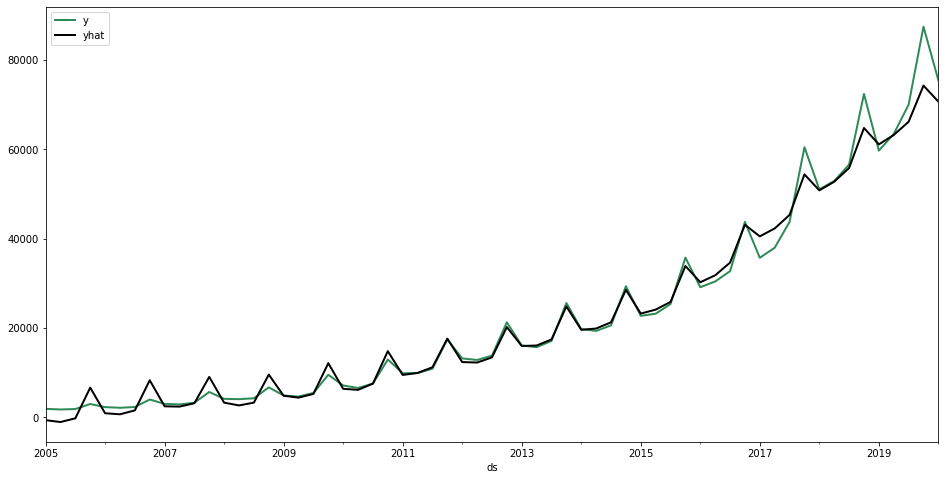

In [12]:
pd.concat([amazon_frame.set_index('ds')['y'], forecast.set_index('ds')['yhat']],axis=1).plot(color=["seagreen", "black"], linewidth=2.0)

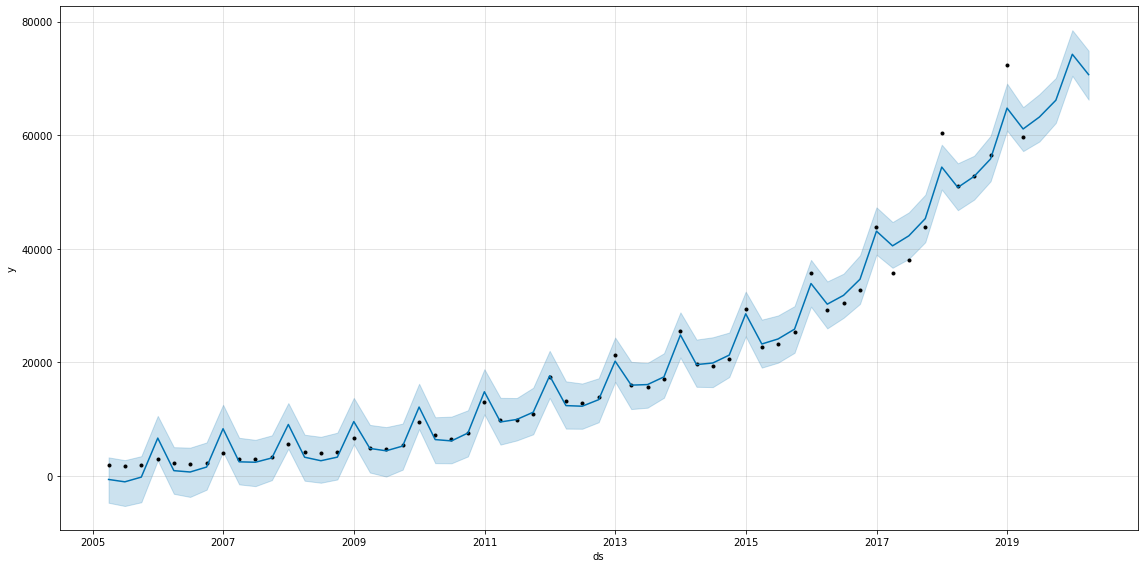

In [14]:
fig1 = model.plot(forecast, figsize=(16,8))

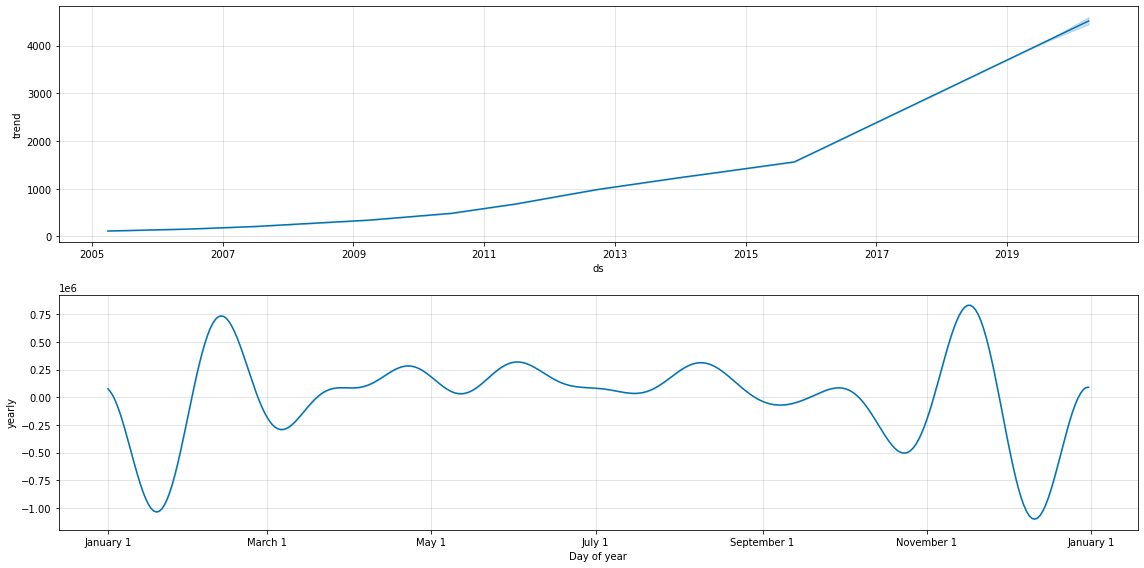

In [24]:
fig2 = model.plot_components(forecast, figsize=(16, 8))

In [17]:
holiday_sale = pd.DataFrame({'holiday': 'dec_jan_sale','ds': pd.to_datetime(['	2019-12-31', '2018-12-31', '2017-12-31', '2016-12-31','2015-12-31', '2014-12-31','2013-12-31','2012-12-31','2011-12-31','2010-12-31','2009-12-31','2008-12-31','2007-12-31','2006-12-31','2005-12-31']),'lower_window': 0,'upper_window': 1,})
holiday_sale

,holiday,ds,lower_window,upper_window
0,dec_jan_sale,2019-12-31,0,1
1,dec_jan_sale,2018-12-31,0,1
2,dec_jan_sale,2017-12-31,0,1
3,dec_jan_sale,2016-12-31,0,1
4,dec_jan_sale,2015-12-31,0,1
5,dec_jan_sale,2014-12-31,0,1
6,dec_jan_sale,2013-12-31,0,1
7,dec_jan_sale,2012-12-31,0,1
8,dec_jan_sale,2011-12-31,0,1
9,dec_jan_sale,2010-12-31,0,1


In [18]:
model2 = Prophet(interval_width=0.95, seasonality_mode='multiplicative', holidays=holiday_sale)
model2.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
forecast = model2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2019-03-31,60098.589527,58417.808535,62053.267251
57,2019-06-30,62627.734827,60728.841495,64430.620198
58,2019-09-30,67792.982748,66008.733293,69639.159613
59,2019-12-31,89317.926197,87463.927704,91349.912185
60,2020-03-31,66836.358707,64741.448053,69020.841409


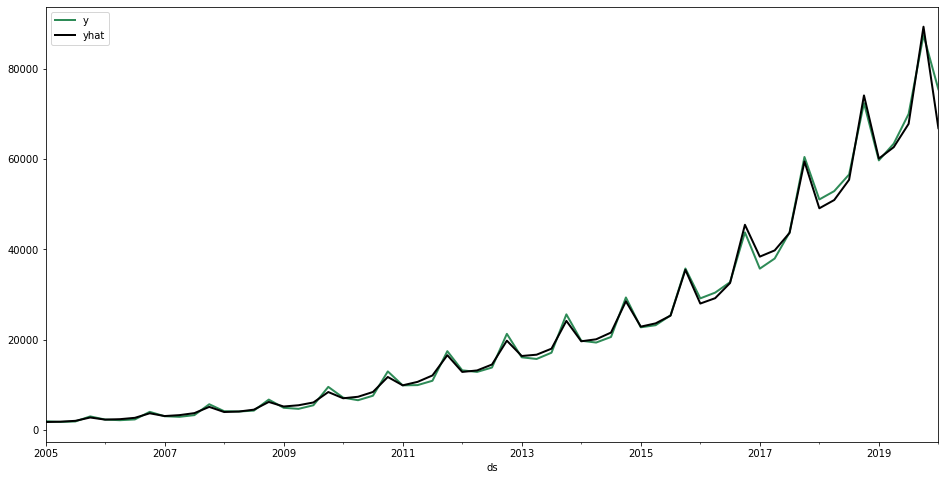

In [20]:
pd.concat([amazon_frame.set_index('ds')['y'],forecast.set_index('ds')['yhat']], axis=1).plot(color=["seagreen", "black"], linewidth=2.0)

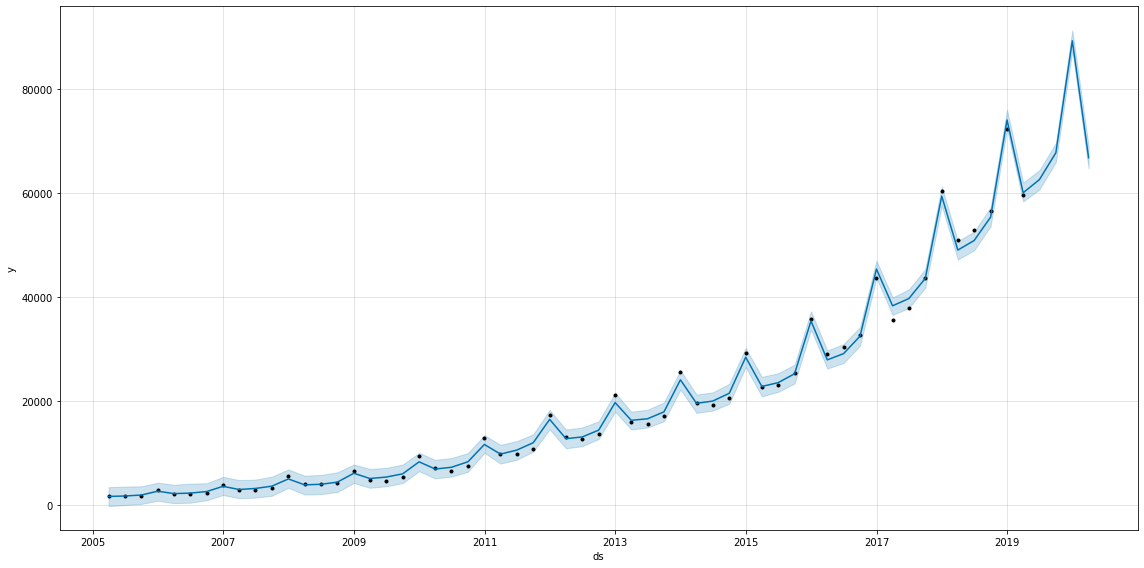

In [21]:
fig1 = model2.plot(forecast, figsize=(16,8))

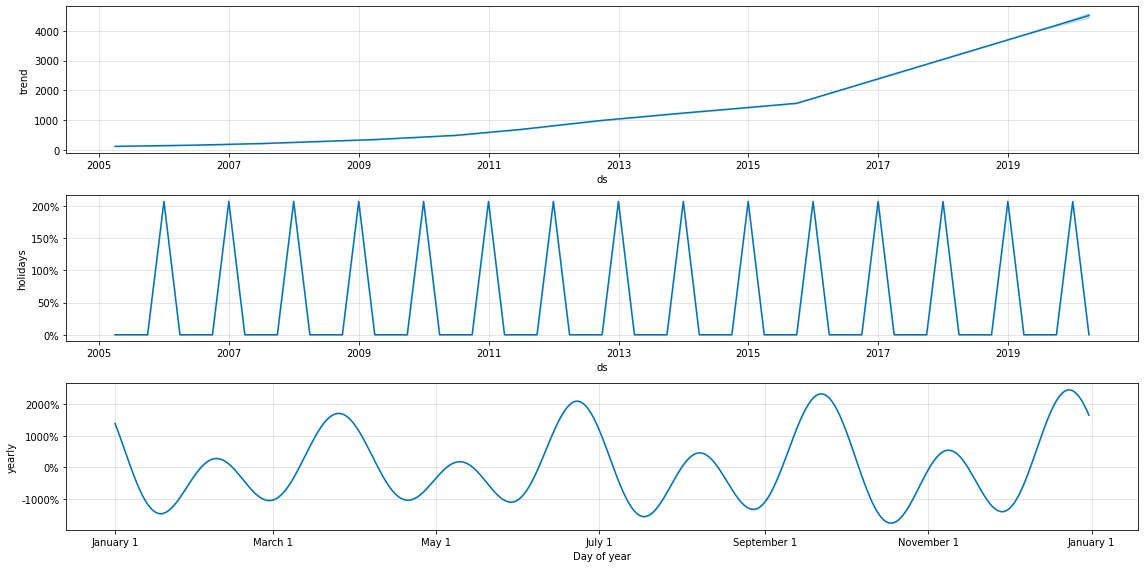

In [22]:
fig2 = model2.plot_components(forecast, figsize=(16,8))